<a href="https://colab.research.google.com/github/dm-bit1/418/blob/main/hw1_warmup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 1 (Warmup): Intro to Python

UIC CS 418, Fall 2023

This assignment gives an introduction to the main programming language and environment for the course: Python and Jupyter notebooks.

* Set up Jupyter on your own computer.
* Python basics, like defining functions.
* Use the numpy library.
* Matrix expressions.

## Due Date

The assignment is provided for your own benefit and it will not be graded. It does not need to be submitted anywhere. However, if you encounter any issues completing it, you should seek help through Piazza or during office hours. Posting solutions to this homework assignment is a violation of the academic integrity policy, as stated in the course syllabus.

## Prerequisites

### Running a Cell

Try running the following cell by pressing Ctrl + Enter.  If you are unfamiliar with Jupyter Notebooks consider skimming [this tutorial](http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb) or selecting **Help -> User Interface Tour** in the menu above.

In [ ]:
print("Hello, world!")

**Jupyter pro-tip**: Even if you are familiar with Jupyter, we strongly encourage you to become proficient with keyboard shortcuts (this will save you time in the future). To learn about keyboard shortcuts go to Tools -> Keyboard Shortcuts in the menu above. Our favorite shortcut is Ctrl+Enter which runs a cell. We also recommend creating a shortcut for clearing a cell's output by going to Tools -> Keyboard Shortcuts and entering "Ctrl-o" for "clear selected output".

## Testing your Setup
If you've set up your environment properly, this cell should run without problems:

In [1]:
import math
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

### Python

Python is the main programming language we will use in the course. Run each cell below and make sure you understand what is happening in each.

If this seems difficult, please review one or more of the following materials.

- **[Python Tutorial](https://docs.python.org/3/tutorial/index.html)**: Introduction to Python from the creators of Python
- **[Composing Programs Chapter 1](http://composingprograms.com/pages/11-getting-started.html)**: This is more of a introduction to programming with Python.
- **[Advanced Crash Course](http://cs231n.github.io/python-numpy-tutorial/)**: A fast crash course which assumes some programming background.

#### Mathematical expressions

In [2]:
# This is a comment.
# In Python, the ** operator performs exponentiation.
math.sqrt(math.e ** (-math.pi + 1))

0.3427354792736325

#### Printing

In [3]:
"Why didn't this line print?"

print("Hello" + ",", "world!")

"Hello, cell" + "output!"

Hello, world!


'Hello, celloutput!'

#### For Loops

In [4]:
# A for loop repeats a block of code once for each
# element in a given collection.
for i in range(5):
    if i % 2 == 0:
        print(2**i)
    else:
        print("Odd power of 2")

1
Odd power of 2
4
Odd power of 2
16


#### List comprehension

In [5]:
[str(i) + " sheep." for i in range(1,5)]

['1 sheep.', '2 sheep.', '3 sheep.', '4 sheep.']

In [6]:
[i for i in range(10) if i % 2 == 0]

[0, 2, 4, 6, 8]

#### Defining functions

In [7]:
def add2(x):
    """This docstring explains what this function does: it adds 2 to a number."""
    return x + 2

#### Getting help

In [8]:
help(add2)

Help on function add2 in module __main__:

add2(x)
    This docstring explains what this function does: it adds 2 to a number.



In [9]:
add2?

You can close the window at the bottom by pressing esc.

#### Passing functions as values

In [10]:
def makeAdder(amount):
    """Make a function that adds the given amount to a number."""
    def addAmount(x):
        return x + amount
    return addAmount

add3 = makeAdder(3)
add3(4)

7

In [11]:
makeAdder(3)(4)

7

#### Anonymous Functions and Lambdas

In [12]:
# add4 is very similar to add2, but it's been created using a lambda expression.
add4 = lambda x: x + 4
add4(5)

9

#### Recursion

In [13]:
def fib(n):
    if n <= 1:
        return 1
    else:
        # Functions can call themselves recursively.
        return fib(n-1) + fib(n-2)

fib(6)

13

### NumPy and Tables

The `NumPy` library lets us do fast, simple computing with numbers in Python.

You should be able to understand the code in the following cells. If not, review the following:

* [DS100 Numpy Review](http://ds100.org/fa17/assets/notebooks/numpy/Numpy_Review.html)
* [Condensed Numpy Review](http://cs231n.github.io/python-numpy-tutorial/#numpy)
* [The Official Numpy Tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html)

**Jupyter pro-tip**: Pull up the docs for any function in Jupyter by running a cell with
the function name and a `?` at the end:

In [14]:
np.arange?

**Jupyter pro-tip**: Pull up the docs for any function in Jupyter by typing the function
name, then `<Shift>-<Tab>` on your keyboard. Super convenient when you forget the order
of the arguments to a function. You can press `<Tab>` multiple tabs to expand the docs.

Try it on the function below:

In [ ]:
np.linspace

You can use the tips above to help you decipher the following code.

In [15]:
# Let's take a 20-sided die...
NUM_FACES = 20

# ...and roll it 4 times
rolls = 4

# What's the probability that all 4 rolls are different? It's:
# 20/20 * 19/20 * 18/20 * 17/20
prob_diff = np.prod((NUM_FACES - np.arange(rolls))
                    / NUM_FACES)
prob_diff

0.72675

In [16]:
# Let's compute that probability for 1 roll, 2 rolls, ..., 20 rolls.
# The array ys will contain:
#
# 20/20
# 20/20 * 19/20
# 20/20 * 18/20
# ...
# 20/20 * 19/20 * ... * 1/20

xs = np.arange(20)
ys = np.cumprod((NUM_FACES - xs) / NUM_FACES)

# Python slicing works on arrays too
ys[:5]

array([1.     , 0.95   , 0.855  , 0.72675, 0.5814 ])

Text(0, 0.5, 'P(all different)')

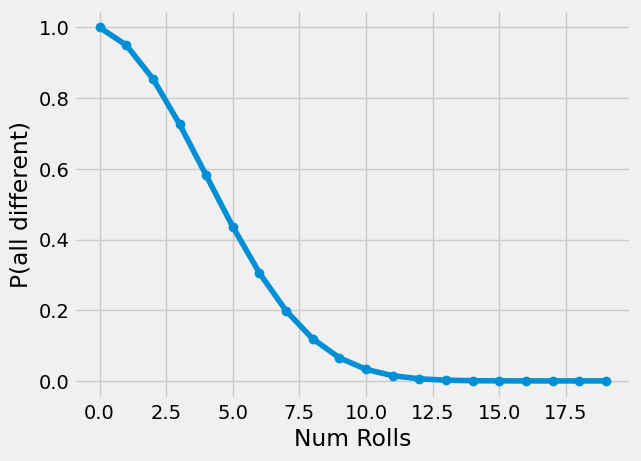

In [17]:
plt.plot(xs, ys, 'o-')
plt.xlabel("Num Rolls")
plt.ylabel('P(all different)')


## Question 1

#### Question 1a
Write a function prime_nums_reversed that takes in an integer `n` and returns a string
containing all prime numbers between 1 and `n` in reverse order, separated
by spaces. For example:

    >>> prime_nums_reversed(5)
    '5 3 2'

***Note:*** The ellipsis (`...`) indicates something you should fill in.  It *doesn't* necessarily imply you should replace it with only one line of code.

***Complete the following block of code:***

In [18]:
# determine if n is prime
def isPrime(n):
  for i in range(2,n):
    if (n%i) == 0:
      return False
  return True
# print the list
def Print(res):
  for i in range(0, len(res)):
    print(res[i], end=" ")
# takes a list and returns all primes up to n
def prime_nums_reversed(n, res):
  for i in range(2,n):
    if (isPrime(i)):
      res.append(i)
  if (isPrime(n)):
    res.append(n)
  res.reverse()
# main
res = []
# test 1
n = 13
prime_nums_reversed(n, res)
Print(res)

13 11 7 5 3 2 

#### Question 1b

Write a function `string_explosion` that takes in a non-empty string like
`"Code"` and returns a long string containing every suffix of the input.
For example:

    >>> string_explosion('Code')
    'Codeodedee'
    >>> string_explosion('data!')
    'data!ata!ta!a!!'
    >>> string_explosion('hi')
    'hii'

**Hint:** Try to use recursion. Think about how you might answering the following two questions:
1. **[Base Case]** What is the `string_explosion` of the empty string?
1. **[Inductive Step]** If you had a `string_explosion` function for the last $n-1$ characters of your string how could you extend it to the $1^{st}$ character? For example, `string_explosion("ode") = "odedee"` becomes `string_explosion("Code") = "Codeodedee"`.

***Complete the following block of code:***

In [19]:
def string_explosion(myString):
  res = myString # copy
  for i in range(0,len(myString)):
    for j in range(i+1, len(myString)):
      res += myString[j]

  print(res, end="\n")

# main, test 1
string_explosion("Code")
# test 2
string_explosion("data!")
# test 3
string_explosion("hi")
# test 4?

Codeodedee
data!ata!ta!a!!
hii


#### Question 1c

Write a function `replace` that takes in two lists: `a` and `b`, and returns a list where the last element of `a` is replaced
by the list `b`.

    >>> combine([1, 2, 3, 4], [5, 6, 7, 8])
    [1, 2, 3, 5, 6, 7, 8]
    >>> combine([8, 4, 3], [4, 1, 3, 0, 10])
    [8, 4, 4, 1, 3, 0, 10]

***Complete the following block of code:***

In [20]:
def replace(a, b):
  res = a
  n = len(res)-1
  res.pop(n)
  res = res + b
  return res
# main, test 1
a = [1,2,3,4]
b = [5,6,7,8]
myL = replace(a,b)
print(myL)
# test 2
a = [8,4,3]
b = [4,1,3,0,10]
myL = replace(a, b)
print(myL)

[1, 2, 3, 5, 6, 7, 8]
[8, 4, 4, 1, 3, 0, 10]


### Question 2

In this question, we'll ask you to use your linear algebra knowledge to fill in NumPy matrices. To conduct matrix multiplication in NumPy, you should write code like the following:


In [21]:
import numpy as np
# A matrix in NumPy is simply a 2-dimensional NumPy array
matA = np.array([
    [1, 2, 3],
    [4, 5, 6],
])

matB = np.array([
    [10, 11],
    [12, 13],
    [14, 15],
])
# Assume only regular matrices
def Multiply(matA, matB):
  n = len(matA)
  m = len(matB[0])
  p = len(matB)
  matR = np.array([])
  # note, it should catch when a is not equal to b
  for i in range(0, n):
    for j in range(0, m):
      for k in range(0, p):
        matR[i][j] += matA[i][k] * matB[k][j]

  return matR

# The notation B @ v means: compute the matrix multiplication Bv
# to do; test it out and trace

You can also use the same syntax to do matrix-vector multiplication or vector dot products.

In [26]:
matA = np.array([
    [1, 2, 3],
    [4, 5, 6],
])

# A vector in NumPy is simply a 1-dimensional NumPy array
some_vec = np.array([ 10, 12, 14, ])

another_vec = np.array([ 10, 20, 30 ])

print(matA @ some_vec)
print(some_vec @ another_vec)

[ 76 184]
760


#### Question 2a

Bob, Daniela, and Luke are shopping for fruit at a store that only sells fruit bowls. A fruit bowl contains some fruit and the price of a fruit bowl is the total price of all of its individual fruit.

The store has mangos for \$1.00, strawberries \$3.00, and apricots \$5.00. The price of each of these can be written in a vector:

$$
\vec{v} = \begin{bmatrix}
     1 \\
     3 \\
     5 \\
\end{bmatrix}
$$

The store sells the following fruit bowls:

#1: 4 of each fruit
#2: 1 mangos and 3 apricots
#3: 4 strawberries and 2 apricots
#4: 12 apricots

Create a 2-dimensional numpy array encoding the matrix $B$ such that the matrix-vector multiplication

$$
B\vec{v}
$$

evaluates to a length 4 column vector containing the price of each fruit bowl. The first entry of the result should be the cost of fruit bowl #1, the second entry the cost of fruit bowl #2, etc.

***Complete the following block of code:***

In [34]:
v = np.array([1,3,5])

def bowl_cost(v):
    b = np.array([[4,4,4],[1,0,3],[0,4,2],[0,0,12]])
    # The notation B @ v means: compute the matrix multiplication Bv
    return b @ v

print(bowl_cost(v))

[36 16 22 60]


#### Question 2b

Bob, Daniela, and Luke make the following purchases:

- Bob buys 3 fruit bowl #2's and 2 fruit bowl #3.
- Daniela buys 2 of each fruit bowl.
- Luke buys 10 fruit bowl #4s (he really likes apricots).

Create a matrix $A$ such that the matrix expression

$$
AB\vec{v}
$$

evaluates to a length 3 column vector containing how much each of them spent. The first entry of the result should be the total amount spent by Bob, the second entry the amount sent by Daniela, etc.

***Complete the following block of code:***

In [39]:
def amount_spent(v, B):
    A = np.array([[0, 3, 2, 0],[2,2,2,2],[0,0,0,10]])

    return A @ B @ v

v = np.array([1,3,5])
b = bowl_cost(v)
cost = amount_spent(v,b)
print(cost)

3896


#### Question 2c

Let's suppose the store changes their fruit prices, but you don't know what they changed their prices to. Bob, Daniela, and Luke buy the same quantity of fruit baskets and the number of fruit in each basket is the same, but now they each spent these amounts:

$$
\vec{x} = \begin{bmatrix}
    40 \\
    100 \\
    120 \\
\end{bmatrix}
$$

Use `np.linalg.inv` and the above final costs to compute the new prices for the individual fruits.

***Complete the following block of code:***

In [51]:
def new_price(A, B, x):
    # Compute the new prices using pseudoinverse of B, then multiply with A and x
    B_pseudo_inv = np.linalg.pinv(B)
    new_v = B_pseudo_inv @ A @ x
    return new_v

# Define matrices A and B, and vector p
b = np.array([[4, 4, 4], [1, 0, 3], [0, 4, 2], [0, 0, 12]])
a = np.array([[0, 3, 2, 0], [2, 2, 2, 2], [0, 0, 0, 10]])
p = np.array([40, 100, 120])


In [52]:
# Define matrices A and B, and vector p
b = np.array([[4, 4, 4], [1, 0, 3], [0, 4, 2], [0, 0, 12]])
a = np.array([[0, 3, 2, 0], [2, 2, 2, 2], [0, 0, 0, 10]])
p = np.array([40, 100, 120])
new_pr = new_price(a,b,p)
print(new_pr)

ValueError: ignored